<a href="https://colab.research.google.com/github/Hamrita/Statistique-Mathematique/blob/main/EstimationPonctuelle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estimation 
## Estimation ponctuelle
### Méthode des moments
__Définition:__ 

1. $\mathbb{E}(X^k)$ est le __moment théorique non centré__ d'ordre $k$.
2. $\mathbb{E}\left[(x-m)^k \right]$ est le __moment théorique centré__ d'ordre $k$ où $m=\mathbb{E}(X)$.
3. $M_k=\dfrac{1}{n}\displaystyle{\sum_{i=1}^nX_i^k}$ est le __moment empirique non centré__ d'ordre $k$.
4. $\mu_k=\dfrac{1}{n}\displaystyle \sum_{i=1}^n(X_i-\overline{X})^k$ est le __moment empirique centré__ d'ordre $k$.

La méthode des moments consiste à égaliser entre les moments théoriques non centrés et les moments empiriques non centrés.

__Exemple 1:__

Soit $(X_1, X_2, \ldots, X_n)$ une suite de $v.a$ $iid$ suivant la loi de $\mathcal{B}(1,p)$ . Déterminer l'estimateur de $p$ par la méthode des moments.

On a $\mathbb{E}(X)=p$ et $M_1=\overline{X}$, d'où $\mathbb{E}(X)=M_1 \Longrightarrow$ $\widehat{p}=\overline{X}$.

__Exemple 2:__

Soit $(X_1, X_2, \ldots, X_n)$ une suite de $v.a$ telle que $X_i\stackrel{iid}{\sim}N(m,\sigma)$. Donner une estimation des paramètres $m$ et $\sigma^2$ par la méthode des moments.

$\mathbb{E}(X)=M_1$ $\Longrightarrow \; \widehat{m}=\overline{X}$.

$\mathbb{E}(X^2)=M_2$ $\Longrightarrow \; \sigma^2 + m^2 = \overline{X^2}$ $\Longrightarrow \sigma^2 = \overline{X^2}- m^2$. Soit $\widehat{\sigma}^2 =\displaystyle \dfrac{1}{n}\sum_{i=1}^n X_i^2 -\widehat{m}^2$

$\widehat{\sigma}^2 =\displaystyle \dfrac{1}{n}\sum_{i=1}^n X_i^2-\overline{X}^2=\dfrac{1}{n}\sum_{i=1}^n\left( X_i-\overline{X}\right)^2$

__Remarque__ On peut, aussi, égaliser entre les moments centré théoriques et empiriques afin de déterminer l'estimateur de $\sigma^2$.

__Exercice__ Soit  l'échantillon $iid$ $(1.66, 7.14, 6.92, 4.10, 7.77, 5.08, 4.57, 2.29, 1.36, 1.67)$ issu de la loi $\gamma(\alpha, \lambda)$. Déterminer une estimation des paramètres $\alpha$ et $\lambda$ par la méthode des moments.

On sait que $\mathbb{E}(X)=\dfrac{\alpha}{\lambda}$ et $\mathbb{V}(X)=\dfrac{\alpha}{\lambda^2}$, donc $\dfrac{\alpha}{\lambda}=\overline{X}$ et $\dfrac{\alpha}{\lambda^2}=\dfrac{1}{n}\displaystyle{\sum_{i=1}^n\left(X_i-\overline{X} \right)^2}$.

D'où, $\dfrac{\overline{X}}{\lambda}=\dfrac{1}{n}\displaystyle{\sum_{i=1}^n\left(X_i-\overline{X} \right)^2}$ $\Longrightarrow \widehat{\lambda}= \dfrac{\displaystyle{\sum_{i=1}^n X_i}}{\displaystyle{\sum_{i=1}^n\left(X_i-\overline{X} \right)^2}}$

Et $\widehat{\alpha}=\widehat{\lambda}\overline{X}=\overline{X}\dfrac{\displaystyle{\sum_{i=1}^n X_i}}{\displaystyle{\sum_{i=1}^n\left(X_i-\overline{X} \right)^2}}$.

In [5]:
x=c(1.66, 7.14, 6.92, 4.10, 7.77, 5.08, 4.57, 2.29, 1.36, 1.67)
n=length(x) ; x.bar=mean(x) ; s2=1/n*sum((x-x.bar)^2)
lambda.hat=x.bar/s2 
alpha.hat=lambda.hat*x.bar
round(lambda.hat, 3)
round(alpha.hat, 3)

[1] 0.785

[1] 3.339

### Méthode du maximum de VS

Soit l'échantillon $iid$ $(2,5,2,3,3,3,1,5)$ issu de la loi de poisson de paramètre $\lambda$. Déterminer l'estimateur de $\lambda$ par la méthode du maximum de vraisemblance.

$f(x)=\dfrac{\lambda^x}{x!}e^{-\lambda}$, d'où le ogarithme de vraisemblance est donné par: $\ell =\displaystyle\sum_{i=1}^n \log(f(x_i)=\log(\lambda) \displaystyle\sum_{i=1}^nX_i-n\lambda-\displaystyle\sum_{i=1}^n\log(x!)$

[1] 3

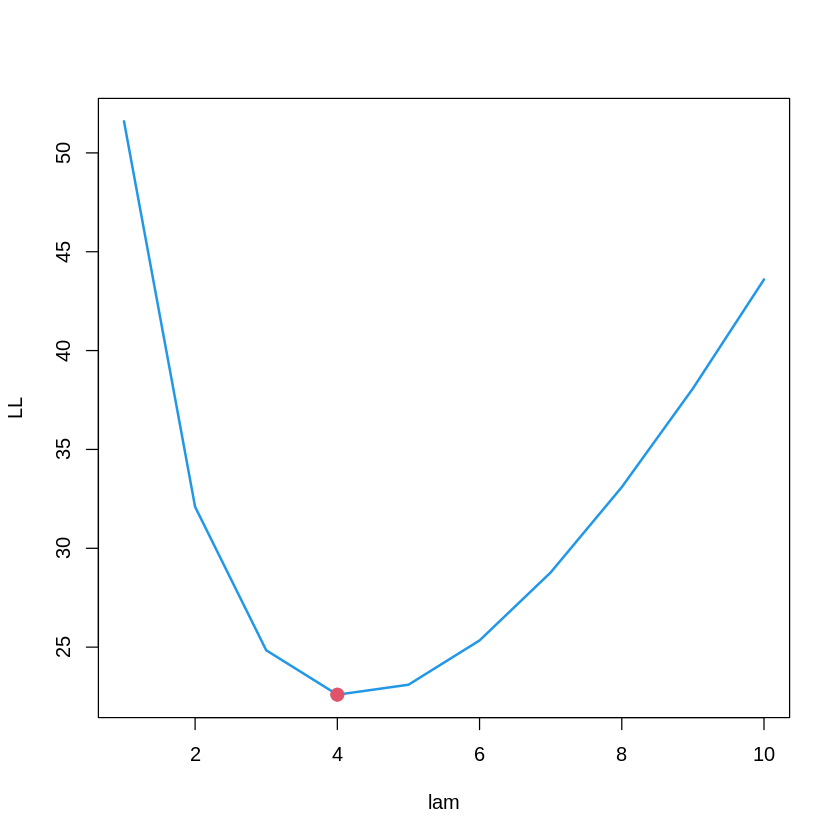

In [41]:
ll=function(x,lambda){
  n=length(x)
  l=log(lambda)*sum(x)-n*lambda-sum(log(factorial(x)))
  return(-l)
}

# graphique de la VS

lam=1:10
xx=c(2,5,2,3,3,3,1,5)
N=length(lam)
LL=NULL
for(i in 1:N) LL[i]=ll(x,lam[i])
plot(lam,LL, type="l", lwd=2, col=4)
idx=which.min(LL) ; points(idx,LL[idx], col=2, pch=10, lwd=4)

Graphiquement, $-\ell$ est minimum pour $\lambda=4$

In [39]:
# numériquement
# on peut utiliser la fonction optim ou nlm

nlm(ll,1, x=xx)

$minimum
[1] 13.96986

$estimate
[1] 2.999999

$gradient
[1] 8.289669e-09

$code
[1] 1

$iterations
[1] 7

On voit bien, que numériquement, $\widehat{\lambda}=3$, qui est égale à $\overline{X}$.

__Exercice__

Soit la régression linéaire simple $y_i=\beta_0+\beta_1x_i+\varepsilon_i$ avec $\varepsilon_i\stackrel{iid}\sim N(0,\sigma)$. Donner une estimation ponctuelle des paramètres $(\beta_0,\beta_1,\sigma)$ par la méthode de vraisemblance.

<table>
  <tr>
    <th>  </th>
    <th>  </th>
    <th>  </th>
    <th>  </th>
    <th>  </th>
    <th>  </th>
    <th>  </th>
    <th>  </th>
    <th>  </th>
    <th>  </th>
    <th>  </th>
  </tr>
  <tr>
    <th> x </th>
    <th> 0.1 </th>
    <th> 0.32 </th>
    <th> 0.52 </th>
    <th> 0.66 </th>
    <th> 0.41 </th>
    <th> 0.91 </th>
    <th> 0.29 </th>
    <th> 0.46 </th>
    <th> 0.33 </th>
    <th> 0.65 </th>

  </tr>
  <tr>
    <th> y </th>
    <th> 0.25 </th>
    <th> 0.81 </th>
    <th> 1.16 </th>
    <th> 1.31 </th>
    <th> 0.7 </th>
    <th> 1.68 </th>
    <th> 0.57 </th>
    <th> 1.2 </th>
    <th> 0.79 </th>
    <th> 1 </th>

  </tr>
</table>

$\varepsilon_i \stackrel{iid}\sim N(0,\sigma) \Longrightarrow \; y_i \stackrel{iid}\sim N(\beta_0+\beta_1x_i,\sigma)$, donc $f(y_i)=\dfrac{1}{\sqrt{2\pi}\sigma}\exp\left(-\dfrac{1}{2\sigma^2}(y_i-\beta_0-\beta_1x_i)^2 \right) \Longrightarrow \; logL=-\dfrac{n}{2}\log(2\pi)-n\log(\sigma)-\dfrac{1}{2\sigma^2}\displaystyle\sum_{i=1}^n(y_i-\beta_0-\beta_1x_i)^2$

In [53]:
x=c(0.1,0.32,0.52,0.66,0.41,0.91,0.29,0.46,0.33,0.65)
y=c(0.25,0.81,1.16,1.31,0.7,1.68,0.57,1.2,0.79,1)

# VS
logL=function(x,y,theta){
  # theta=(beta0,beta1,sigma)
  n=length(x)
  b0=theta[1]
  b1=theta[2]
  sig=theta[3]
  ll=-n/2*log(2*pi)-n*log(sig)-1/(2*sig^2)*sum((y-b0-b1*x)^2)
  -ll
}

# Estimation

theta=optim(fn=logL,par=c(1,1,1),
           x=x,y=y,
           lower=c(-Inf,-Inf,0.001),
           upper=c(Inf, Inf, Inf),
           method="L-BFGS-B",hessian=TRUE)
theta$par

[1] 0.1786281 1.6524133 0.1430038

Examinons le résultat. En utilisant la méthode des MCO, on aura $\widehat{\beta}=(X'X)^{-1}X'Y$ et $\widehat{\sigma}^2=\dfrac{\sum (y_i-\widehat{y}_i)^2}{n-k-1}$

In [61]:
X=cbind(1,x)
y=as.matrix(y)
beta=solve(crossprod(X))%*%crossprod(X,y)
y.hat=beta[1,1]+beta[2,1]*x
sig2=sum((y-y.hat)^2)/8
c(beta,sqrt(sig2))

[1] 0.1786274 1.6524142 0.1598768